# Structuring Data Exercise: Numpy dtypes

Before looking at Python Classes and Objects, we motivate the need for structured data using some simple image data. In this exercise you will be prompted to fill in sections using what you now know about structuring data with dtypes.

In [1]:
# Notebook Styling
from IPython.core.display import HTML
def css_styling():
    sheet = '../css/custom.css'
    styles = open(sheet, "r").read() 
    return HTML(styles)
css_styling()

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

# The image pixel size - constant for all images in this exercise
Nx = Ny = 72

Create a structured array of images in the next cell: for this we will need to define the `dtype` for the array. This should involve passing a list of length 3 as an argument to `np.dtype` defining the 3 data types required by elements (images) in the array:

1. An $x$ component - The array of regularly spaced pixels x values from 1 to 0 (image colour values in pgm files start from top right pixel). Array of type float64, length $Nx$.

2. A $y$ component - similar to $x$, but with length $Ny$

3. A $z$ component - the array of grey levels for each pixel in the image. Array of float64, shape ($Nx, Ny$)

In [2]:
# Create the dtype
dt = np.dtype([('x', np.float64, (Nx)), ('y', np.float64, (Ny)), 
               ('z', np.float64, (Nx,Ny))])

# create a new zero'ed array of length 4 using your dtype
imgs = np.zeros(4, dtype=dt)

Now create the normalised x and y values between 1 and 0 - these are the same for each image.

*(Hint: Numpy linspace works backwards too ....)*

In [3]:
xs = np.linspace(1., 0, Nx)
ys = np.linspace(1., 0., Ny)

Fill in the exercise in the next section to input $xs$ and $ys$ data. Also look at the format of the code: hopefully this is more readable and neater than creating separate unstructured arrays.

['../exercises/data/img1.pgm', '../exercises/data/img2.pgm', '../exercises/data/img3.pgm', '../exercises/data/img4.pgm']


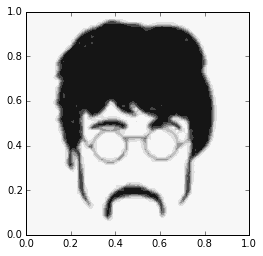

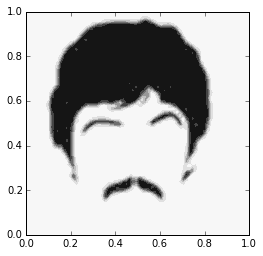

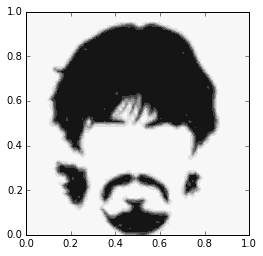

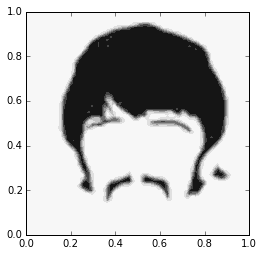

In [4]:
# The image file names
names = ['img1.pgm', 'img2.pgm', 'img3.pgm', 'img4.pgm']
files = [os.path.join('..', 'exercises', 'data', name) for name in names]

print(files)

for i, file in enumerate(files):
    # This reads in the color data (top 4 rows are headings)
    imgs['z'][i] = np.loadtxt(file, skiprows=4).reshape(Nx, Ny)
    
    # Input data in to the structured format
    (imgs['x'][i], imgs['y'][i]) = (xs, ys)

# A typical program would do something clever with the data here

# Visualisation: Notice we can iterate over imgs directly
for img in imgs:
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.contourf(img['x'], img['y'], img['z'], cmap=cm.Greys_r)

For your entertainment, we'll sum the pixel value of those images and plot the (normalised) result:

<matplotlib.contour.QuadContourSet instance at 0x10d3357a0>

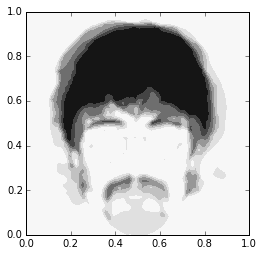

In [5]:
combined = np.zeros(1, dtype=dt)
combined['x'][0] = xs
combined['y'][0] =  ys

for img in imgs:
    combined['z'][0] += img['z']

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.contourf(combined['x'][0], combined['y'][0], combined['z'][0], cmap=cm.Greys_r)